In [17]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
from sklearn.model_selection import GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans # clustering
from sklearn.cluster import DBSCAN # clustering 

In [2]:
# 기계학습
# 1. Supervised Learning -> y값 (target, label) 예측 
# 2. Unsupervised Learing -> 어떤 형태로 무리지어져있는가 예측하기 제일 쉬움 (clustering) 
# 여기서는 Unsupervised Learning 에 해당하는 clustering 을 다룬다.  

In [22]:
km = KMeans(n_clusters=5)

In [4]:
import mglearn

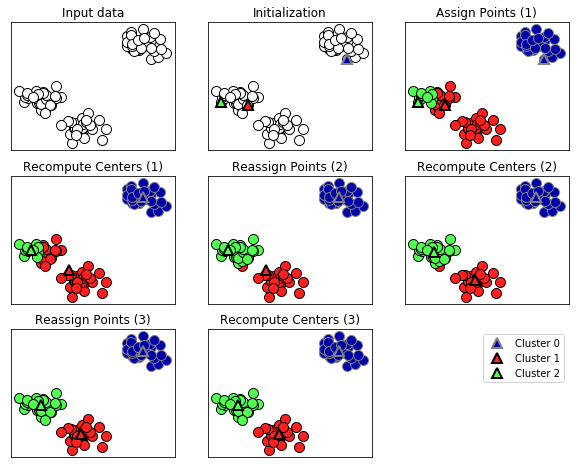

In [5]:
mglearn.plot_kmeans.plot_kmeans_algorithm()

In [6]:
iris = sns.load_dataset('iris')

In [7]:
iris

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
5             5.4          3.9           1.7          0.4     setosa
6             4.6          3.4           1.4          0.3     setosa
7             5.0          3.4           1.5          0.2     setosa
8             4.4          2.9           1.4          0.2     setosa
9             4.9          3.1           1.5          0.1     setosa
10            5.4          3.7           1.5          0.2     setosa
11            4.8          3.4           1.6          0.2     setosa
12            4.8          3.0           1.4          0.1     setosa
13            4.3          3.0           1.1          0.1     setosa
14            5.8          4.0           1.2          0.2     setosa
15            5.7          4.4           1.5          0.4     setosa
16            5.4          3.9           1.3          0.4     setosa
17            5.1          3.5           1.4          0.3     setosa
18            5.7          3.8           1.7          0.3     setosa
19            5.1          3.8           1.5          0.3     setosa
20            5.4          3.4           1.7          0.2     setosa
21            5.1          3.7           1.5          0.4     setosa
22            4.6          3.6           1.0          0.2     setosa
23            5.1          3.3           1.7          0.5     setosa
24            4.8          3.4           1.9          0.2     setosa
25            5.0          3.0           1.6          0.2     setosa
26            5.0          3.4           1.6          0.4     setosa
27            5.2          3.5           1.5          0.2     setosa
28            5.2          3.4           1.4          0.2     setosa
29            4.7          3.2           1.6          0.2     setosa
..            ...          ...           ...          ...        ...
120           6.9          3.2           5.7          2.3  virginica
121           5.6          2.8           4.9          2.0  virginica
122           7.7          2.8           6.7          2.0  virginica
123           6.3          2.7           4.9          1.8  virginica
124           6.7          3.3           5.7          2.1  virginica
125           7.2          3.2           6.0          1.8  virginica
126           6.2          2.8           4.8          1.8  virginica
127           6.1          3.0           4.9          1.8  virginica
128           6.4          2.8           5.6          2.1  virginica
129           7.2          3.0           5.8          1.6  virginica
130           7.4          2.8           6.1          1.9  virginica
131           7.9          3.8           6.4          2.0  virginica
132           6.4          2.8           5.6          2.2  virginica
133           6.3          2.8           5.1          1.5  virginica
134           6.1          2.6           5.6          1.4  virginica
135           7.7          3.0           6.1          2.3  virginica
136           6.3          3.4           5.6          2.4  virginica
137           6.4          3.1           5.5          1.8  virginica
138           6.0          3.0           4.8          1.8  virginica
139           6.9          3.1           5.4          2.1  virginica
140           6.7          3.1           5.6          2.4  virginica
141           6.9          3.1           5.1          2.3  virginica
142           5.8          2.7           5.1          1.9  virginica
143           6.8          3.2           5.9          2.3  virginica
144           6.7          3.3           5.7          2.5  virginica
145           6.7          3.0           5.2          2.3  virginica
146

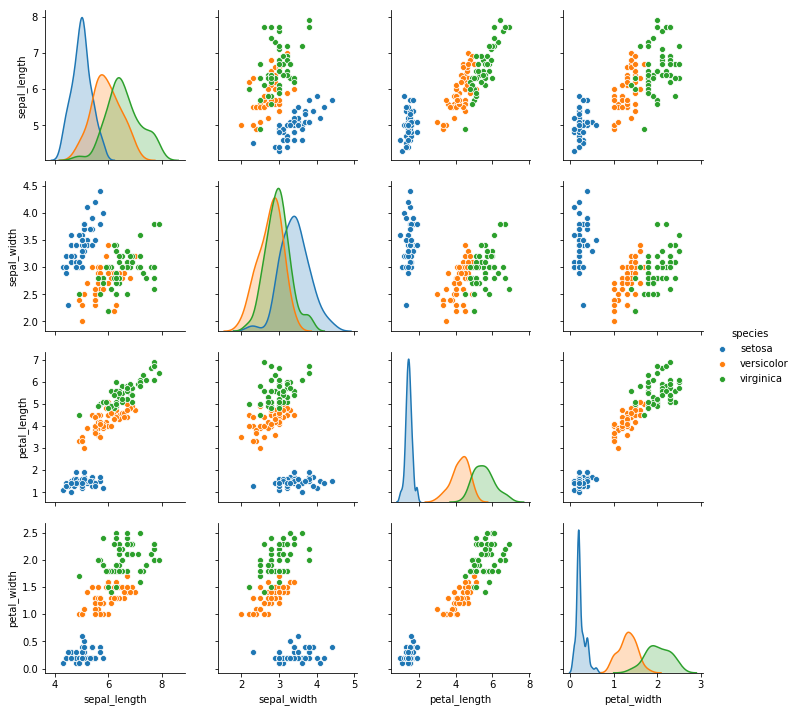

In [8]:
sns.pairplot(iris,hue='species')

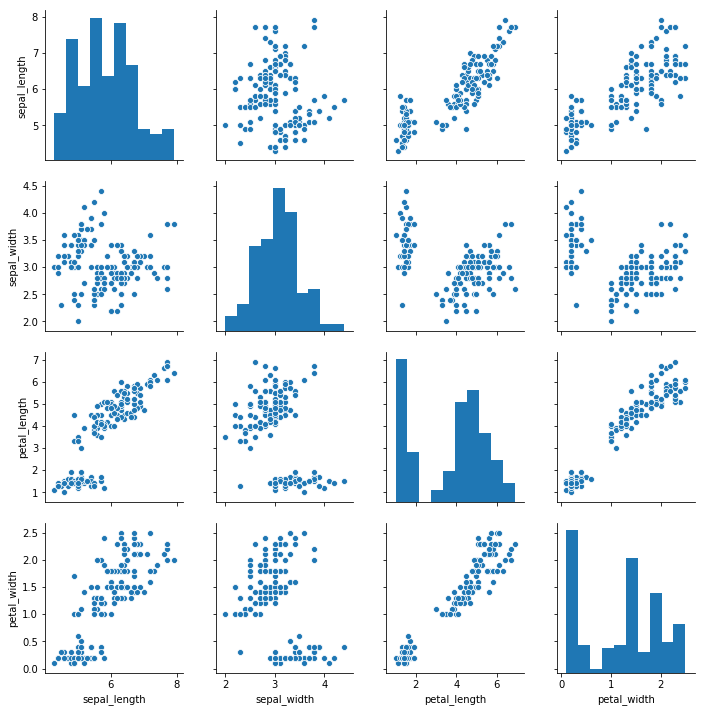

In [9]:
sns.pairplot(iris) # 다차원공간에서는 어떤 형태로 묶여졌는지 알 수 없다. 

In [10]:
# 잘 모르는데 닶이 없는 애들이 어떤 형태로 구성되어 있는지 예측할 때 clustering 기법을 쓴다. 

In [23]:
km.fit(iris.iloc[:,:-1]) # n_clusters=8 -> 데이터가 8 개의 묶음으로 구성 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [24]:
km.predict([[3,3,3,3]])

array([3], dtype=int32)

In [16]:
# 클러스터링 -> KMeans (Unsupervised Learning 기법)
# 8개의 점을 찍고 평균값을 옮겨가면 묶음의 중앙에 점이 수렴하게 되는 것이 KMeans 기법이다. 
# 묶음이 어디에 속해있는지만 예측이 가능하다.
# Supervised Learning 에 비해 성공사례는 매우 적다. 
# Supervised Learning은 정답 데이터 만들기가 어렵다. 
# 최근 경향 
# Unsupervised Learning을 통해 답이 없는 데이터들을 몇 가지 묶음으로 해서 새로 라벨링을 해서 이 라벨링된 데이터들을 
# Supervised Learning에 넣어서 예측할 수 있다.

In [18]:
dbs = DBSCAN() 
# 기본적으로 샘플 5개를 원으로 만들어서 묶음으로 만들고 묶음 별로 데이터 만든 후 target 칼럼 만들고 A, B, C, D로 라벨링하는 것이 DBSCAN임 

In [19]:
dbs.fit(iris.iloc[:,:-1])

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

In [20]:
vars(dbs) # 원을 만든다. 샘플 5개 이용하여 원을 만들어서 묶음으로 만듦 
# 묶음 별로 데이터 만든 후 target이란 컬럼 만들고 A, B, C, D 이런식으로 라벨링함 

{'eps': 0.5,
 'min_samples': 5,
 'metric': 'euclidean',
 'metric_params': None,
 'algorithm': 'auto',
 'leaf_size': 30,
 'p': None,
 'n_jobs': None,
 'core_sample_indices_': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  16,  17,  19,  20,  21,  23,  24,  25,  26,  27,  28,  29,
         30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  42,  43,
         44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
         58,  61,  63,  65,  66,  67,  69,  70,  71,  72,  73,  74,  75,
         76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  88,  89,
         90,  91,  92,  94,  95,  96,  97,  99, 101, 102, 103, 104, 110,
        111, 112, 115, 116, 120, 121, 123, 124, 125, 126, 127, 128, 132,
        133, 136, 137, 138, 139, 140, 142, 143, 144, 145, 146, 147, 149]),
 'labels_': array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
     

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


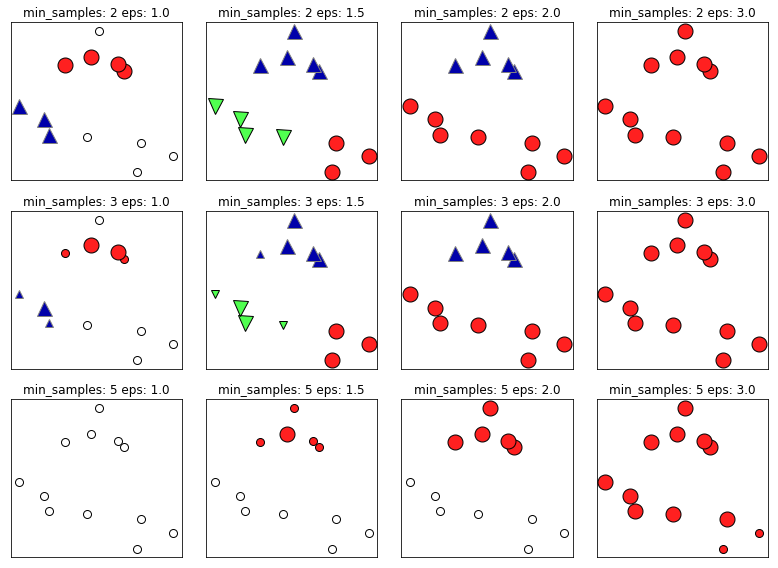

In [21]:
mglearn.plot_dbscan.plot_dbscan() # eps 가 반경같은 개념 